In [ ]:
#5. Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
a. Data preparation
b. Generate training data
c. Train model
d. Output

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec
import re
import bs4 as bs
import urllib.request
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#a. Data preparation
scrapped_data=urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article=scrapped_data.read()
paresed_article=bs.BeautifulSoup(article,'lxml')
paragraphs=paresed_article.find_all('p')
article_text=""
for p in paragraphs:
  article_text+=p.text
sentences=article_text

In [4]:
print(article_text)

Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] Quick progress in the field of deep learning, beginning in 2010s, allowed neural networks to surpass many previous approaches in performance.[2]
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] The application of ML to business problems is known as predictive analytics.
Statistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning.[6][7]
From a theoretical viewpoint, probably approximately correct (PAC) learning provides a framework for describing machine learni

In [5]:
sentences="""Alice 23 opened the door and found that it led into a small 90
passage, not much larger than a rat-hole:  she knelt down and
looked along the passage into the loveliest garden you ever saw.
How she longed to get out of that dark hall, and wander about
among those beds of bright flowers and those cool fountains, but
she could not even get her head through the doorway; `and even if
my head would go through,' (thought) $poor Alice, `it would be of
very little use without my shoulders.  Oh, how I wish
I could shut up like a telescope!  I think I could, if I only
know how to begin.'  For, you see, so many out-of-the-way things
had happened lately, that Alice had begun to think that very few
things indeed were really impossible.


"""

In [6]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
print(sentences)

Alice 23 opened the door and found that it led into small 90 passage not much larger than rat hole she knelt down and looked along the passage into the loveliest garden you ever saw How she longed to get out of that dark hall and wander about among those beds of bright flowers and those cool fountains but she could not even get her head through the doorway and even if my head would go through thought poor Alice it would be of very little use without my shoulders Oh how wish could shut up like telescope think could if only know how to begin For you see so many out of the way things had happened lately that Alice had begun to think that very few things indeed were really impossible


In [7]:
# remove special characters
sentences = re.sub('[^A-Za-z]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()




In [8]:
print (sentences)


alice opened the door and found that it led into small passage not much larger than rat hole she knelt down and looked along the passage into the loveliest garden you ever saw how she longed to get out of that dark hall and wander about among those beds of bright flowers and those cool fountains but she could not even get her head through the doorway and even if my head would go through thought poor alice it would be of very little use without my shoulders oh how wish could shut up like telescope think could if only know how to begin for you see so many out of the way things had happened lately that alice had begun to think that very few things indeed were really impossible


In [9]:
all_sent=nltk.sent_tokenize(sentences)
all_words=[nltk.word_tokenize(sent) for sent in all_sent]

In [10]:
print (sentences)

alice opened the door and found that it led into small passage not much larger than rat hole she knelt down and looked along the passage into the loveliest garden you ever saw how she longed to get out of that dark hall and wander about among those beds of bright flowers and those cool fountains but she could not even get her head through the doorway and even if my head would go through thought poor alice it would be of very little use without my shoulders oh how wish could shut up like telescope think could if only know how to begin for you see so many out of the way things had happened lately that alice had begun to think that very few things indeed were really impossible


In [11]:
print (all_words)

[['alice', 'opened', 'the', 'door', 'and', 'found', 'that', 'it', 'led', 'into', 'small', 'passage', 'not', 'much', 'larger', 'than', 'rat', 'hole', 'she', 'knelt', 'down', 'and', 'looked', 'along', 'the', 'passage', 'into', 'the', 'loveliest', 'garden', 'you', 'ever', 'saw', 'how', 'she', 'longed', 'to', 'get', 'out', 'of', 'that', 'dark', 'hall', 'and', 'wander', 'about', 'among', 'those', 'beds', 'of', 'bright', 'flowers', 'and', 'those', 'cool', 'fountains', 'but', 'she', 'could', 'not', 'even', 'get', 'her', 'head', 'through', 'the', 'doorway', 'and', 'even', 'if', 'my', 'head', 'would', 'go', 'through', 'thought', 'poor', 'alice', 'it', 'would', 'be', 'of', 'very', 'little', 'use', 'without', 'my', 'shoulders', 'oh', 'how', 'wish', 'could', 'shut', 'up', 'like', 'telescope', 'think', 'could', 'if', 'only', 'know', 'how', 'to', 'begin', 'for', 'you', 'see', 'so', 'many', 'out', 'of', 'the', 'way', 'things', 'had', 'happened', 'lately', 'that', 'alice', 'had', 'begun', 'to', 'think

In [12]:
#b. Generate training data
from nltk.corpus import stopwords
for i in range(len(all_words)):
  all_words[i]=[w for w in all_words[i] if w not in stopwords.words('english')]

In [13]:
print (all_words)

[['alice', 'opened', 'door', 'found', 'led', 'small', 'passage', 'much', 'larger', 'rat', 'hole', 'knelt', 'looked', 'along', 'passage', 'loveliest', 'garden', 'ever', 'saw', 'longed', 'get', 'dark', 'hall', 'wander', 'among', 'beds', 'bright', 'flowers', 'cool', 'fountains', 'could', 'even', 'get', 'head', 'doorway', 'even', 'head', 'would', 'go', 'thought', 'poor', 'alice', 'would', 'little', 'use', 'without', 'shoulders', 'oh', 'wish', 'could', 'shut', 'like', 'telescope', 'think', 'could', 'know', 'begin', 'see', 'many', 'way', 'things', 'happened', 'lately', 'alice', 'begun', 'think', 'things', 'indeed', 'really', 'impossible']]


In [14]:
#c. Train model
data =all_words

In [15]:
print  (all_words)

[['alice', 'opened', 'door', 'found', 'led', 'small', 'passage', 'much', 'larger', 'rat', 'hole', 'knelt', 'looked', 'along', 'passage', 'loveliest', 'garden', 'ever', 'saw', 'longed', 'get', 'dark', 'hall', 'wander', 'among', 'beds', 'bright', 'flowers', 'cool', 'fountains', 'could', 'even', 'get', 'head', 'doorway', 'even', 'head', 'would', 'go', 'thought', 'poor', 'alice', 'would', 'little', 'use', 'without', 'shoulders', 'oh', 'wish', 'could', 'shut', 'like', 'telescope', 'think', 'could', 'know', 'begin', 'see', 'many', 'way', 'things', 'happened', 'lately', 'alice', 'begun', 'think', 'things', 'indeed', 'really', 'impossible']]


In [16]:
data1=data[0]

In [17]:
model1 = gensim.models.Word2Vec(data, min_count = 1,vector_size = 52, window = 5)

In [18]:
vocabulary=list(model1.wv.index_to_key)
print(vocabulary)

['could', 'alice', 'passage', 'think', 'things', 'even', 'head', 'get', 'would', 'ever', 'saw', 'longed', 'indeed', 'dark', 'loveliest', 'hall', 'wander', 'among', 'garden', 'looked', 'along', 'bright', 'knelt', 'hole', 'rat', 'larger', 'much', 'small', 'led', 'found', 'door', 'opened', 'beds', 'fountains', 'flowers', 'wish', 'lately', 'happened', 'way', 'many', 'see', 'begin', 'know', 'telescope', 'like', 'shut', 'oh', 'cool', 'shoulders', 'without', 'use', 'little', 'poor', 'thought', 'go', 'doorway', 'really', 'begun', 'impossible']


In [19]:
wrd='door'
#wrd=['subset','machine', 'learning','closely','related']
v1=model1.wv[wrd]
similar_words=model1.wv.most_similar(wrd)
for x in similar_words:
  print(x)

('beds', 0.36491504311561584)
('much', 0.3305249512195587)
('shut', 0.32979297637939453)
('cool', 0.25908932089805603)
('wish', 0.243193581700325)
('oh', 0.24176433682441711)
('begun', 0.2212926298379898)
('begin', 0.17681987583637238)
('loveliest', 0.14279094338417053)
('things', 0.13509944081306458)


In [20]:
print(data1)

['alice', 'opened', 'door', 'found', 'led', 'small', 'passage', 'much', 'larger', 'rat', 'hole', 'knelt', 'looked', 'along', 'passage', 'loveliest', 'garden', 'ever', 'saw', 'longed', 'get', 'dark', 'hall', 'wander', 'among', 'beds', 'bright', 'flowers', 'cool', 'fountains', 'could', 'even', 'get', 'head', 'doorway', 'even', 'head', 'would', 'go', 'thought', 'poor', 'alice', 'would', 'little', 'use', 'without', 'shoulders', 'oh', 'wish', 'could', 'shut', 'like', 'telescope', 'think', 'could', 'know', 'begin', 'see', 'many', 'way', 'things', 'happened', 'lately', 'alice', 'begun', 'think', 'things', 'indeed', 'really', 'impossible']


In [21]:
#print(data)

dat = []

for i in range(0, len(data) ):
    context = [data1[i - 2], data1[i - 1], data1[i+1], data1[i + 2]]
    target = data1[i]
    dat.append((context, target))
print(dat[:5])
#print(dat[1][0])

[(['really', 'impossible', 'opened', 'door'], 'alice')]


In [22]:
#for val in dat:
 # print(val[0],val[1])
i=0
print(dat[i][0],dat[i][1])
print(model1.predict_output_word(dat[i][0]))

['really', 'impossible', 'opened', 'door'] alice
[('even', 0.016949415), ('lately', 0.016949397), ('among', 0.016949339), ('saw', 0.016949316), ('indeed', 0.016949307), ('door', 0.016949296), ('poor', 0.016949272), ('oh', 0.01694927), ('happened', 0.016949248), ('begin', 0.016949242)]


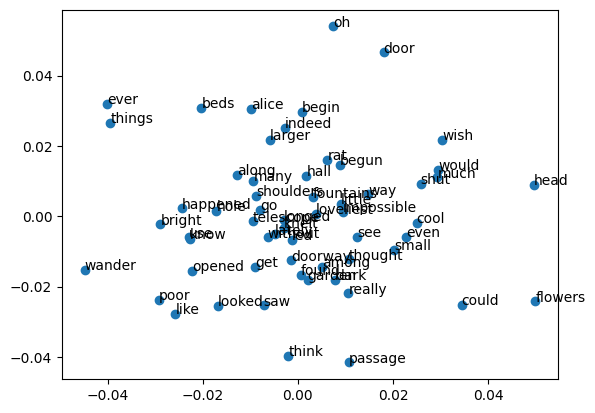

In [23]:
#d. Output
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Get the word vectors from the Word2Vec model
X = model1.wv.vectors

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the word vectors using PCA
result = pca.fit_transform(X)

# Get the list of words corresponding to the word vectors
words = list(model1.wv.index_to_key)

# Create a scatter plot of the reduced word vectors
pyplot.scatter(result[:, 0], result[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show()